## 新知识总不能走马观花，图片处理加深理解CNN的原理
+ `tf.nn.conv2d()`使用tensor作为输入，所以image data需要添加维度
使用`tf.reshape(x, [1, x_w, x_h, 1])`或者`tf.expand_dims(data, 1)`

+ `tf.nn.conv2d`传入的filter是[filter_height, filter_width, in_channels, out_channels],而`tf.nn.avg_pool`的kernel（filter）是[batch，filter_height, filter_width, channels]
+ sess.run(conv_img, feed_dict={x:img})等返回的是一个tensor，所以图片保存要删除维度
+ 所有操作都要sess.run

In [16]:
import tensorflow as tf
import numpy as np
import cv2
%matplotlib inline
def read_img(list_path):
    img_datas = []
    for path in list_path:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = np.expand_dims(img, axis=0)
        img_datas.append(img)
    return np.vstack(img_datas)


def conv_vertical(img):
    k = tf.Variable(np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]]), dtype=tf.float32)
    x = tf.placeholder(tf.float32, shape=img.shape)
    x_w, x_h = img.shape
    x_tensor = tf.reshape(x, [1, x_w, x_h, 1])
    #
    kernel = tf.reshape(k, [3, 3, 1, 1])

    conv_img = tf.nn.conv2d(x_tensor, kernel, strides=[1, 1, 1, 1], padding='SAME')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        new_img = sess.run(conv_img, feed_dict={x:img}) #输出也是tensor，去掉batch和chanel
        print(new_img.shape)
        new_img = sess.run(tf.squeeze(new_img)) #tf.squeeze返回的是tensor，所以要sees.run
        print(new_img.shape)
        print(type(new_img))
        cv2.imwrite(r'./image/shampoo_edg.png', new_img)
        return new_img

def conv_horizontal(img):
    k = tf.Variable(np.array([[1, 1, 1],
                            [0, 0, 0],
                            [-1, -1, -1]]), dtype=tf.float32)
    x = tf.placeholder(tf.float32, shape=img.shape)
    x_w, x_h = img.shape
    x_tensor = tf.reshape(x, [1, x_w, x_h, 1])
    #
    kernel = tf.reshape(k, [3, 3, 1, 1])

    conv_img = tf.nn.conv2d(x_tensor, kernel, strides=[1, 1, 1, 1], padding='SAME')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        new_img = sess.run(conv_img, feed_dict={x:img}) #输出也是tensor，去掉batch和chanel
        new_img = sess.run(tf.squeeze(new_img)) #tf.squeeze返回的是tensor，所以要sees.run
        cv2.imwrite(r'./image/shampoo_h_edg.png', new_img)
        return new_img


def average_pool(img):
    x_w, x_h, x_c = img.shape
    print(img.shape)
    x = tf.placeholder(tf.float32, shape=img.shape)
    x_tensor = tf.reshape(x, [1, x_w, x_h, x_c])
    average = tf.nn.avg_pool(x_tensor, ksize=[1, 4, 4, 1], strides=[1, 1, 1, 1], padding='SAME')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        new_img = sess.run(average, feed_dict={x: img})
        new_img = sess.run(tf.squeeze(new_img)) #tf.squeeze返回的是tensor，所以要sees.run
        print(new_img.shape)
        cv2.imwrite(r'./image/shampoo_aver.png', new_img)
        return new_img


def add_noise(img):
    noise = np.random.normal(0, 20, size=img.shape)

    x = tf.placeholder(tf.float32, shape=img.shape)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        x_w, x_h = img.shape
        x = tf.placeholder(dtype=tf.float32, shape=(x_w, x_h))
        conv_img = tf.add(x, tf.cast(noise, dtype=tf.float32))
        # #conv_img = tf.add(x, tf.Variable(20, dtype=tf.float32))
        new_img = sess.run(conv_img, feed_dict={x:img})
        cv2.imwrite(r'./image/shampoo_noise.png',new_img)
        return new_img


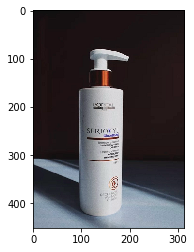

In [28]:
import matplotlib.pyplot as plt
path = r'./image/shampoo.png'
img_original = cv2.imread(path, cv2.IMREAD_COLOR)
plt.imshow(img_original)

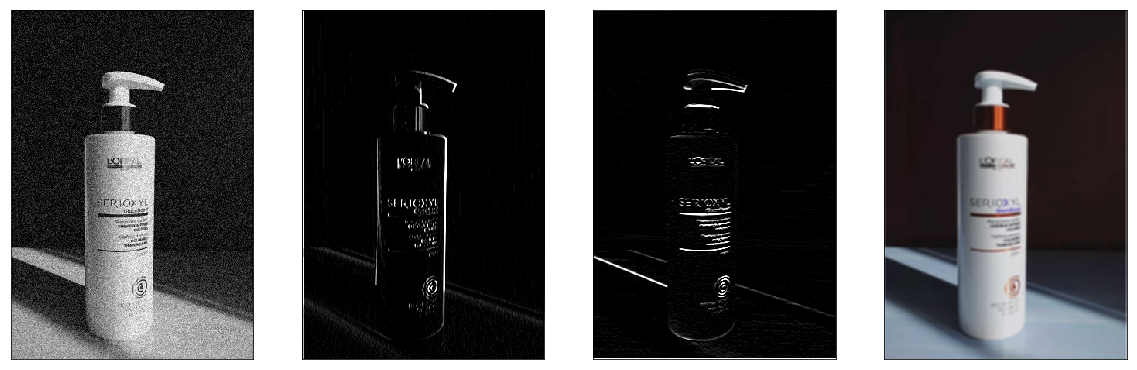

In [26]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#conv_vertical(img)
#conv_horizontal(img)
# average_pool(img)
paths = [
    r'./image/shampoo_noise.png',
    r'./image/shampoo_edg.png',
    r'./image/shampoo_h_edg.png',
    r'./image/shampoo_aver.png'
]
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    img = cv2.imread(paths[i])
    ax.imshow(img)